# 6.6 Sourcing and Analysing Time Series

In [1]:
# Start by importing the data and libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
path = 'D:\Downloads\Data Analytics\TASK 6'

In [3]:
df = pd.read_csv(os.path.join(path,'df_clean5.csv'), index_col = False)

In [4]:
df

,id,model year,manufacturer,model,cylinders,fuel,price,mileage,car conditions,transmission,car type,car colour,state,Date posted,mileage category,price category,American date
0,7308841185,1989,unknown,kenworth t-600,unknown,diesel,500,1111,parts only,manual,truck,white,North Carolina,18/04/2021,very low mileage,very cheap,2021-04-18
1,7306992109,1994,chevrolet,unknown,8 cylinders,gas,500,1000,clean,manual,truck,red,Wisconsin,14/04/2021,very low mileage,very cheap,2021-04-14
2,7302434257,1982,honda,cb750sc,4 cylinders,gas,500,1,clean,manual,other,unknown,Colorado,05/04/2021,new,very cheap,2021-04-05
3,7313155712,1987,ford,thunderbird turbo coupe,6 cylinders,gas,500,0,parts only,automatic,coupe,black,California,26/04/2021,new,very cheap,2021-04-26
4,7315266718,2016,gmc,yukon,8 cylinders,gas,501,70153,clean,automatic,SUV,unknown,California,01/05/2021,decent mileage,very cheap,2021-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294951,7314331466,2020,ferrari,f8 tributo,8 cylinders,gas,347999,3000,clean,automatic,coupe,unknown,California,29/04/2021,very low mileage,very expensive,2021-04-29
294952,7306488355,2020,ferrari,f8 tributo,8 cylinders,gas,349999,2800,clean,automatic,coupe,unknown,California,13/04/2021,very low mileage,very expensive,2021-04-13
294953,7303420900,2003,unknown,any and all,5 cylinders,diesel,400123,123321,clean,automatic,pickup,blue,Pennsylvania,07/04/2021,high mileage,very expensive,2021-04-07
294954,7313051670,2016,unknown,Lambo Aventador SV Roadster,12 cylinders,gas,516999,9982,clean,automatic,convertible,white,Florida,26/04/2021,very low mileage,very expensive,2021-04-26


### 6.6.3 Subset

In this case I'll consider the count of posted cars everyday during the period of time (1 month), so the creating of a subset is necessary.

In [5]:
# I have faced some issues with the sorting, because it was not sorting correctly the american date system
# So I had to manually edit the file on excel to just update the date format.
df1 = df['American date'].value_counts(dropna=False).sort_index()

In [6]:
df1

2021-04-04     3111
2021-04-05     5313
2021-04-06     4965
2021-04-07     5419
2021-04-08     6238
2021-04-09     6454
2021-04-10     5424
2021-04-11     4043
2021-04-12     6180
2021-04-13     5876
2021-04-14     7118
2021-04-15     7239
2021-04-16     7890
2021-04-17     7438
2021-04-18     4755
2021-04-19     7438
2021-04-20     7526
2021-04-21     8620
2021-04-22     9791
2021-04-23    13058
2021-04-24    10077
2021-04-25     6052
2021-04-26    11394
2021-04-27    12305
2021-04-28    12989
2021-04-29    14301
2021-04-30    19547
2021-05-01    18261
2021-05-02    12487
2021-05-03    23696
2021-05-04    19951
Name: American date, dtype: int64

In [7]:
df2 = pd.read_csv(os.path.join(path,'df_date.csv'), index_col = False)

In [8]:
df2

,Date,Count
0,2021-04-04,3111
1,2021-04-05,5313
2,2021-04-06,4965
3,2021-04-07,5419
4,2021-04-08,6238
5,2021-04-09,6454
6,2021-04-10,5424
7,2021-04-11,4043
8,2021-04-12,6180
9,2021-04-13,5876


In [9]:
# Set the "Date" column as the index

from datetime import datetime

df2['datetime'] = pd.to_datetime(df2['Date']) # Create a datetime column from "Date."
df2 = df2.set_index('datetime') # Set the datetime as the index of the dataframe.
df2.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df2.head()

,Count
datetime,
2021-04-04,3111
2021-04-05,5313
2021-04-06,4965
2021-04-07,5419
2021-04-08,6238


### 6.6.4 Line chart

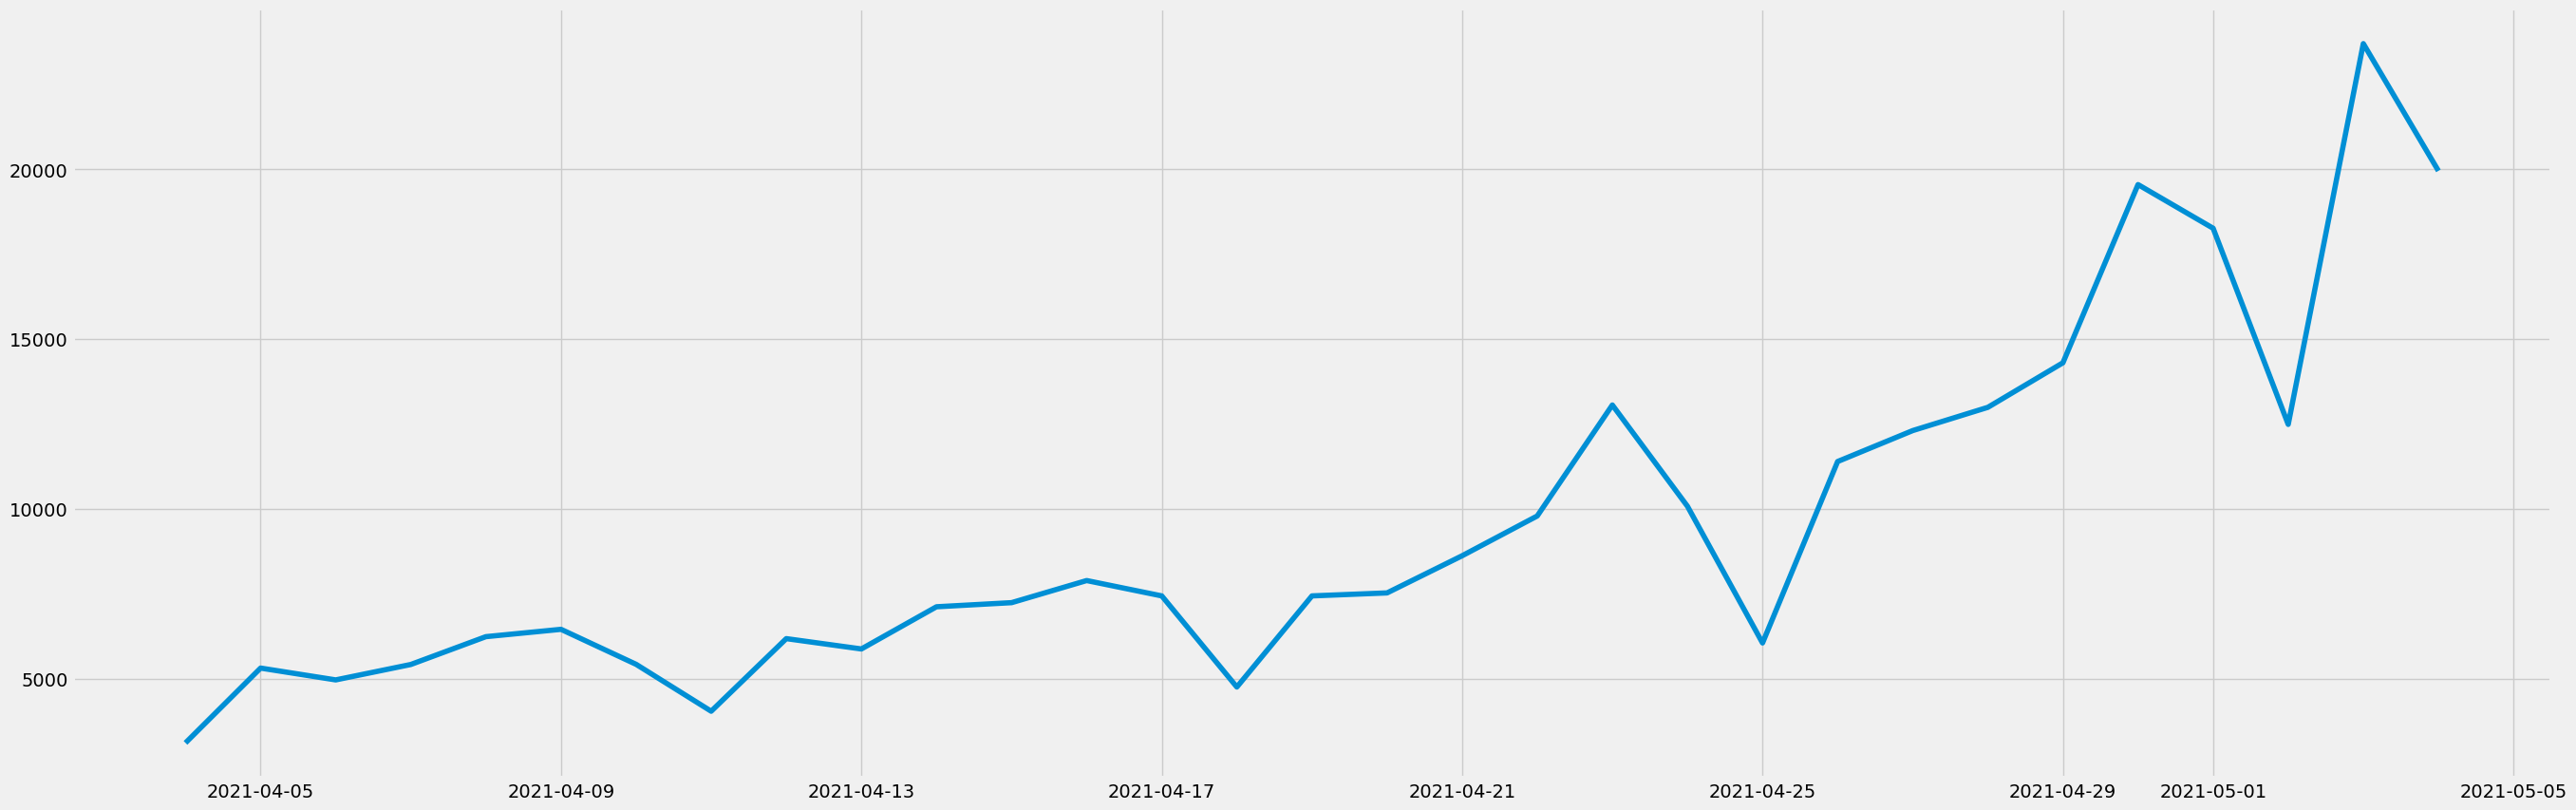

In [10]:
# Now lets plot it on a line chart
plt.figure(figsize=(30,10), dpi=100) 
plt.plot(df2)

### 6.6.5 Decomposing data

In [11]:
decomposition = sm.tsa.seasonal_decompose(df2, model='additive')

In [12]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

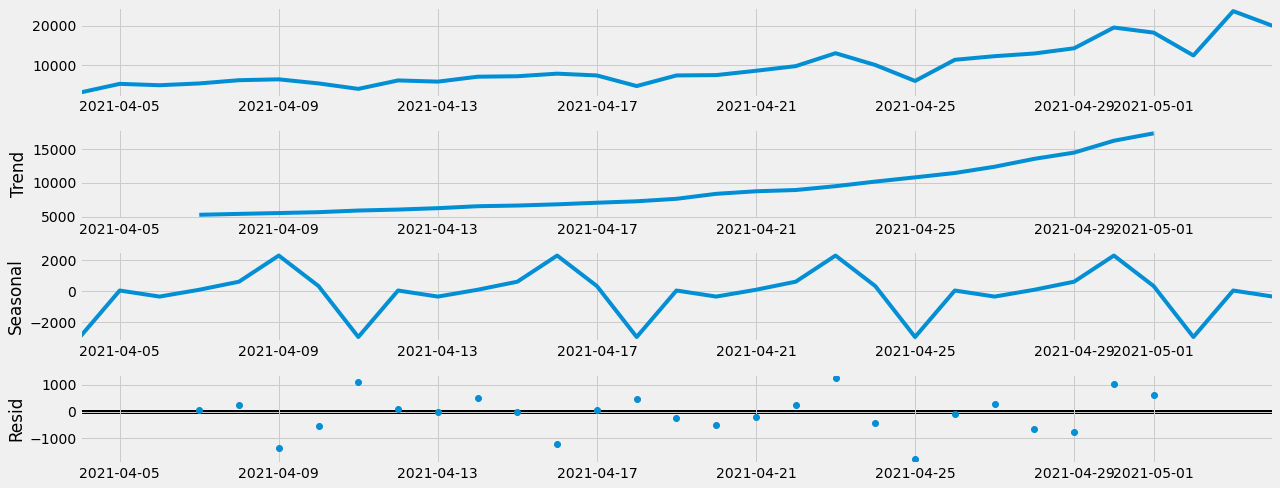

In [13]:
# And finally plotting
decomposition.plot()
plt.show()

From the trend we can find out that most of the car offers are appearing by the end of the month, which could lead to conclude that either car sellers prepare for the begining of the month with more offers, or people sell more by the end of the month, as money could be running low.
It is hard to vind a seasonal information, as we are measuring only a period of 1 month, but we can still find some paterns of increasing and decreasing the amount of offer every 7 days

### 6.6.6 Dickey-Fuller test 

In [14]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df2['Count'])

Dickey-Fuller Stationarity test:
Test Statistic                  3.472571
p-value                         1.000000
Number of Lags Used             9.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [15]:
# As we can see from the observations above, the data is indeed non-stationary
# The 'Test Statistic' is higher than the 'Critical value'

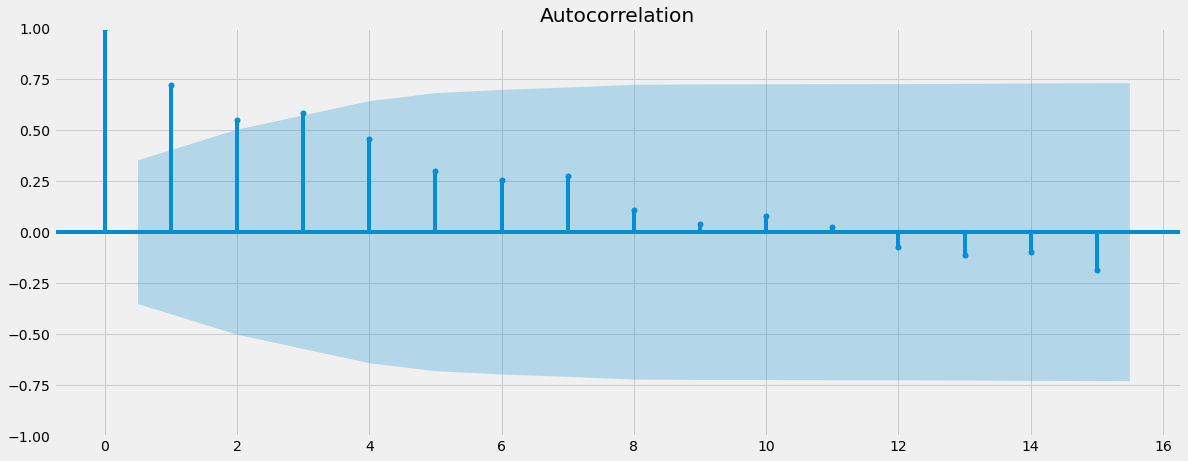

In [16]:
# Now, regarding autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df2)
plt.show()

In [17]:
# The autocorrelation are mostly within the blue area. 
# Which does not support much the initial concept of the data being non-stationary

### 6.6.7 Stationarizing the non-stationary data

In [18]:
data_diff = df2 - df2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [19]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [20]:
data_diff.head()

,Count
datetime,
2021-04-05,2202.0
2021-04-06,-348.0
2021-04-07,454.0
2021-04-08,819.0
2021-04-09,216.0


In [21]:
data_diff.columns

Index(['Count'], dtype='object')

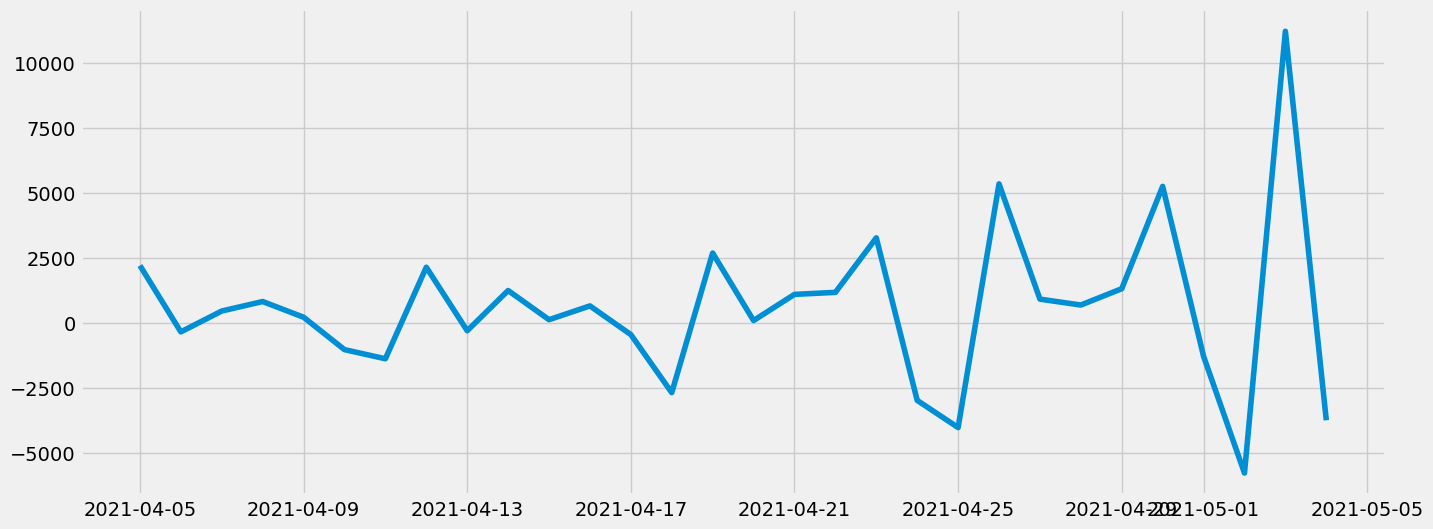

In [27]:
# Now checking the new time-curve graph

plt.figure(figsize=(15,6), dpi=100)
plt.plot(data_diff)

In [ ]:
# As we can see there is a notieceable difference in the graph, and it seems to have lost a bit of the upward trend
# Even though it still shows increases, they are not as noticeable as before due to the falls

In [23]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  1.968506
p-value                         0.998631
Number of Lags Used             9.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


In [ ]:
# It is also possible to notice that the Test statistic has indeed reduced,
# However stil not enough to be lower than the critical value.
# Meaning that the data remains non-stationary.

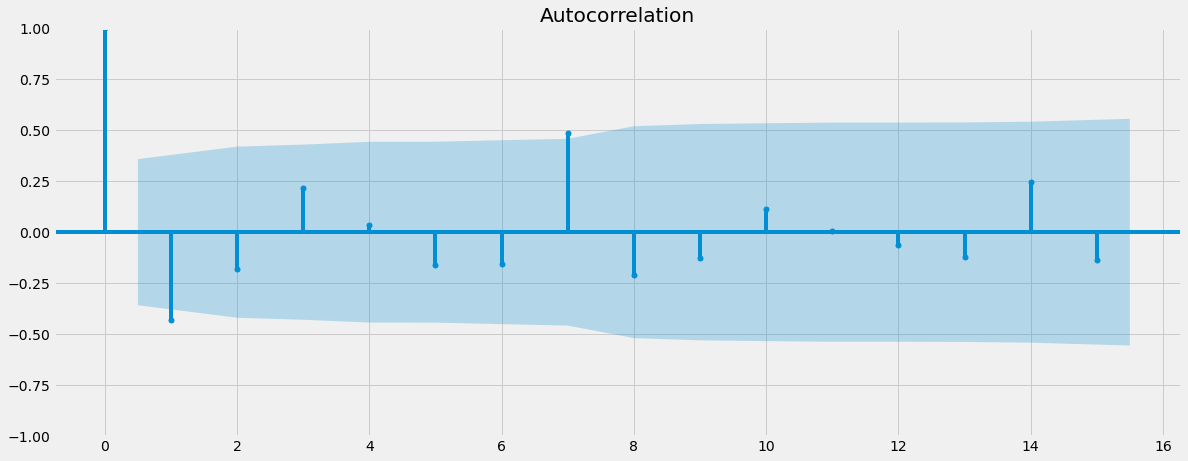

In [24]:
plot_acf(data_diff)
plt.show()

### 6.6.8 Stationarizing the non-stationary data again!

In [28]:
data_diff2 = data_diff - data_diff.shift(1)

In [29]:
data_diff2.dropna(inplace = True)

In [30]:
data_diff2.head()

,Count
datetime,
2021-04-06,-2550.0
2021-04-07,802.0
2021-04-08,365.0
2021-04-09,-603.0
2021-04-10,-1246.0


In [31]:
data_diff2.columns

Index(['Count'], dtype='object')

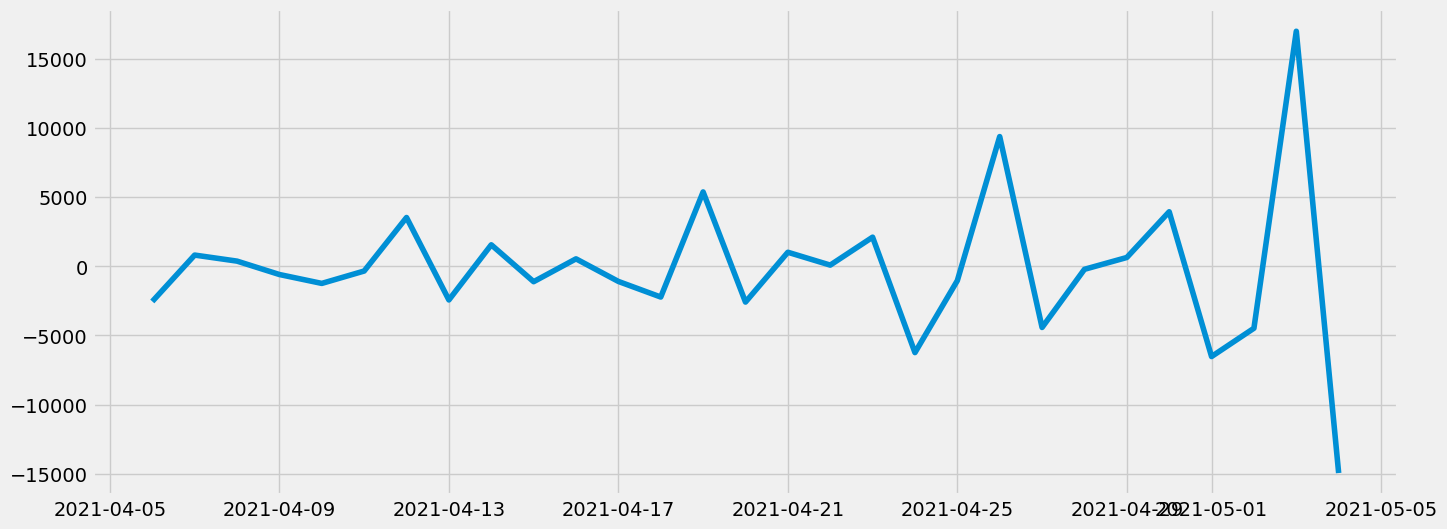

In [32]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(data_diff2)

In [33]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -8.923861e+00
p-value                        1.023784e-14
Number of Lags Used            5.000000e+00
Number of Observations Used    2.300000e+01
Critical Value (1%)           -3.752928e+00
Critical Value (5%)           -2.998500e+00
Critical Value (10%)          -2.638967e+00
dtype: float64


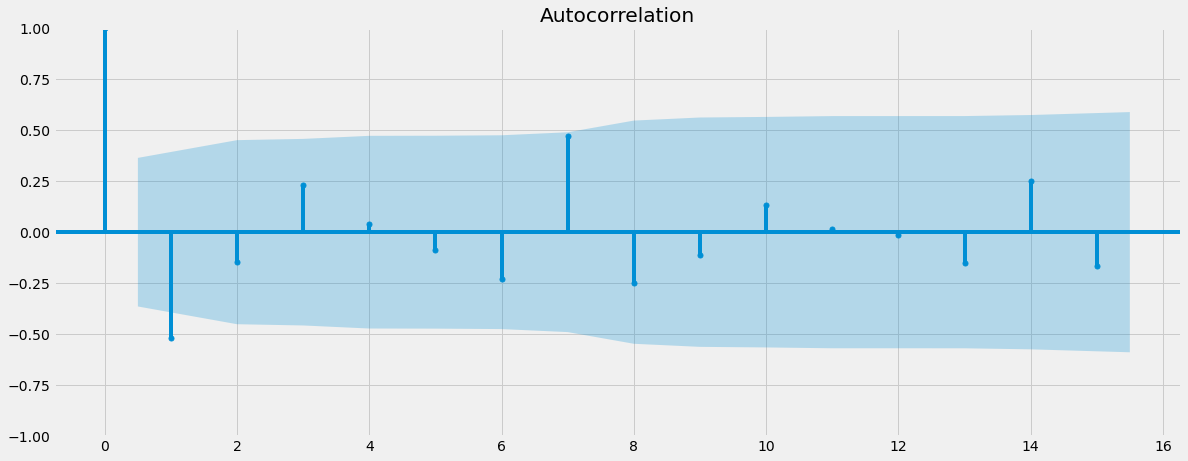

In [34]:
plot_acf(data_diff2)
plt.show()

In [ ]:
# Now we finally get a Stationary data based on the non-stationary one